In [204]:
%matplotlib inline
import module
from module import *
reload(module=module);

##  Load Example Dataset

In [148]:
data1 = loadmat('data1.mat')
X = data1['X']
Xval = data1['Xval']
yval = data1['yval']

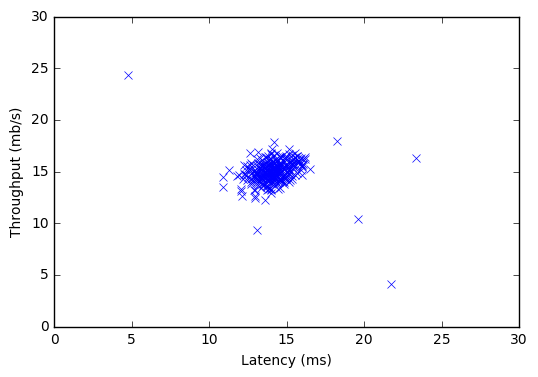

In [149]:
#  Visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bx')
plt.axis([0, 30, 0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

##  Estimate the dataset statistics
We assume Gaussioan distribution

In [164]:
#  Estimate my and sigma2
mu, sigma2 = estimateGaussian(X.copy())

In [165]:
#  Returns the density of the multivariate normal at each data point (row) 
#  of X
p = multivariateGaussian(X.copy(), mu, sigma2)

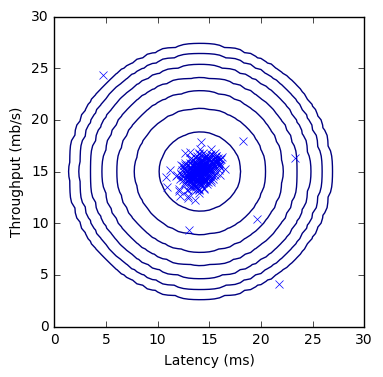

In [169]:
visualizeFit(X.copy(),mu,sigma2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

##  Find Outliers

In [177]:
pval = multivariateGaussian(Xval.copy(), mu, sigma2)

In [181]:
epsilon, F1=selectThreshold(yval.ravel(),pval.ravel())

/Users/ofialko/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


In [184]:
epsilon

8.9908527792694946e-05

In [191]:
#  Find the outliers in the training set
outliers = np.argwhere(p<epsilon)

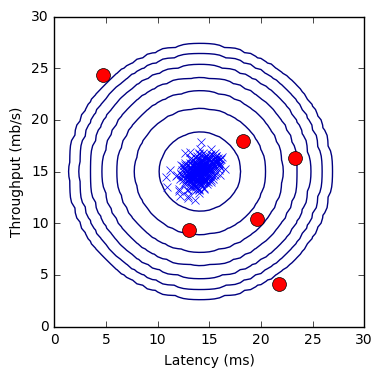

In [193]:
visualizeFit(X.copy(),mu,sigma2)
plt.plot(X[outliers, 0], X[outliers, 1], 'ro', lw = 2, ms= 10)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)');

##  Multidimensional Outliers

In [196]:
data2 = loadmat('data2.mat')
X = data2['X']
Xval = data2['Xval']
yval = data2['yval']

In [198]:
#  Apply the same steps to the larger dataset
mu, sigma2 = estimateGaussian(X.copy())

In [199]:
#  Training set 
p = multivariateGaussian(X.copy(), mu, sigma2)

In [200]:
#  Cross-validation set
pval = multivariateGaussian(Xval.copy(), mu, sigma2)

In [201]:
#  Find the best threshold
epsilon, F1 = selectThreshold(yval.ravel(), pval.ravel())

/Users/ofialko/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in long_scalars


In [202]:
print('Best epsilon found using cross-validation: %e' % epsilon)
print('Best F1 on Cross Validation Set:  %f' % F1)
print('# Outliers found: %d' % np.sum(p < epsilon))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Outliers found: 117
